# Original Voce-Chaboche Model Fitting Using Only Tension Test Example 1

An example of fitting the original Voce-Chaboche model to only a tension test is presented in this notebook.

Documentation for all the functions used in this example can be found by either looking at docstrings for any of the functions.

In [1]:
import RESSPyLab as rpl
import numpy as np

## Run the constrained tensile-only optimization

This is a canonical example for fitting the Voce-Chaboche model to a tension test with cyclic behavior embedded through constraints on the parameters.
A simple model appears to work best in this case, so only one backstress is specified.

The overall steps to calibrate the model parameters are as follows:
1. Load the tension test
2. Choose a starting point
3. Set the bounds on the hardening metric constraints
4. Set the location to save the analysis history
5. Run the analysis

In [2]:
# Specify the true stress-strain of the tension test to be used in the calibration
data_files = ['example_3.csv']

# Set initial parameters for the Voce-Chaboche model with one backstresses
# [E, \sigma_{y0}, Q_\infty, b, C_1, \gamma_1]
x_0 = np.array([200000., 355., 1.0, 1.0, 1.0, 1.0])

# Set the bounds on the hardening metrics
rho_iso_inf = 0.35
rho_iso_sup = 0.50
rho_yield_inf = 1.5
rho_yield_sup = 2.5
rho_gamma_b_inf = 2.25
rho_gamma_b_sup = 3.25
rho_gamma_12_inf = 0.
rho_gamma_12_sup = 0.

# Log files for the parameters at each step, and values of the objective function at each step
x_log = './output/tensile_x_log.txt'
fun_log = './output/tensile_fun_log.txt'

# Run the calibration
# Set filter_data=True if you have NOT already filtered/reduced the data
# We recommend that you filter/reduce the data beforehand (i.e., filter_data=False is recommended)
sol = rpl.vc_tensile_opt_scipy(x_0, data_files, rho_iso_inf, rho_iso_sup, rho_yield_inf, rho_yield_sup,
                               rho_gamma_b_inf, rho_gamma_b_sup, rho_gamma_12_inf, rho_gamma_12_sup,
                               x_log_file=x_log, fun_log_file=fun_log, filter_data=True,
                               max_its=600, tol=1.e-8, make_x0_feasible=True)
# Two objects are returned, the solution point is the first one
x_sol = sol[0]

/Users/ahartloper/anaconda/envs/py27/lib/python2.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   1   |   0   | +8.5677e+03 | 1.00e+00 | 1.36e+02 | 0.00e+00 |
|   2   |   2   |   1   | +8.3682e+03 | 7.00e+00 | 1.66e+02 | 0.00e+00 |
|   3   |   3   |   2   | +7.4550e+03 | 7.00e+00 | 1.24e+02 | 1.41e-01 |
|   4   |   4   |   3   | +7.4550e+03 | 1.79e+00 | 1.24e+02 | 1.41e-01 |
|   5   |   5   |   4   | +7.4074e+03 | 1.25e+01 | 1.23e+02 | 9.87e-02 |
|   6   |   6   |   5   | +7.1021e+03 | 1.26e+01 | 1.16e+02 | 1.34e-02 |
|   7   |   7   |   6   | +5.8241e+03 | 8.80e+01 | 9.15e+01 | 7.72e-04 |
|   8   |   8   |   9   | +3.2977e+03 | 6.16e+02 | 4.67e+00 | 0.00e+00 |
|   9   |   9   |  12   | +2.3090e+03 | 2.43e+03 | 4.25e+01 | 3.62e-02 |
|  10   |  10   |  17   | +1.3283e+03 | 2.43e+03 | 2.67e+00 | 4.15e-02 |
|  11   |  11   |  21   | +1.3112e+03 | 2.43e+03 | 2.49e+00 | 1.62e-02 |
|  12   |  12   |  25   | +3.8718e+02 | 4.54e+03 | 

## Plot results

After the analysis is finished we can plot the test data versus the fitted model. 
Note that we add two dummy parameters to the list of final parameters because the plotting function was written for the updated Voce-Chaboche model that has two additional parameters. 
Setting the first of these two additional parameters equal to zero neglects the effects of the updated model.

If we set `output_dir='./output/'`, for example, instead of `output_dir=''` the `uvc_data_plotter` function will save pdf's of all the plots instead of displaying them below.

The function `uvc_data_multi_plotter` is also provided to give more fine-grained control over the plotting process, and can compare multiple analyses.

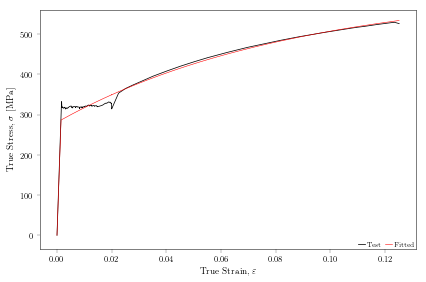

In [4]:
data = rpl.load_data_set(data_files)
# Added parameters are necessary for plotting the Voce-Chaboche model
x_sol_2 = np.insert(x_sol, 4, [0., 1.])
rpl.uvc_data_plotter(x_sol_2, data, output_dir='', file_name='vc_tensile_example_plot', plot_label='Fitted')